In [22]:
import lazypredict
import mat4py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import scipy.io
import os 
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import KFold
import math

In [3]:
## 
## load data

In [2]:
import scipy.io
Connectomes = scipy.io.loadmat('../Cells2Connectomes/Connectomes.mat')
Connectome_direct = Connectomes['C_dir']


'''

Region volumes, in a 424 vector, to get connectivity density, divide
% each row in connectomes by each entry in the vector to get density. Units
% are in 200 micron per vertex voxels.

'''

CellType_volumn = mat4py.loadmat('../Cells2Connectomes/Regional_Volumes.mat')
CellType_volumn = CellType_volumn['region_vols']
Celltype_volumn =np.array([np.array(xi) for xi in CellType_volumn])
print(Celltype_volumn.shape)

# Nomarlize by the entry

Connectome_direct_density = Connectome_direct/Celltype_volumn

(424, 1)


In [3]:
Cell_type = mat4py.loadmat('../Cells2Connectomes/CellType_Maps.mat')
Cell_type = Cell_type['cellmaps']
Cell_type


[[2.640354622479152e-06,
  0.00011459630767782458,
  2.321962832547196e-05,
  2.171390791795974e-05,
  2.4657999836563716e-05,
  4.370576815750043e-05,
  1.965831014687446e-05,
  1.1151161479170432e-05,
  0.0,
  3.3259911500811893e-06,
  7.290408661890039e-07,
  3.097526426898585e-06,
  0.0,
  0.0,
  4.358512501857081e-06,
  1.1692087231989174e-06,
  4.2394210717006636e-05,
  8.205046674648536e-05,
  1.3928388337509572e-05,
  3.0530477504857846e-05,
  7.010221349817313e-06,
  1.6435586209724803e-05,
  1.448191561467807e-05,
  1.6943548909423987e-05,
  6.728317283060036e-06],
 [3.0077037238157555e-05,
  3.0477132143164334e-05,
  6.874561270991909e-06,
  3.0038444493296936e-05,
  7.918258464017956e-05,
  3.1563145865609755e-05,
  2.2132686581847424e-05,
  7.370603967861003e-06,
  4.9595214102847046e-05,
  0.0,
  4.1020056043768764e-05,
  4.5709110261171835e-05,
  1.4000717813162635e-05,
  7.102858758689186e-05,
  7.882579804506146e-06,
  5.151676894409207e-05,
  2.8033518769713243e-05,
 

In [4]:
import matplotlib.pyplot as plt

In [5]:
Cell_type = mat4py.loadmat('../Cells2Connectomes/CellType_Maps.mat')
Cell_type = Cell_type['cellmaps']
Celltype_mtx =np.array([np.array(xi) for xi in Cell_type])
Celltype_mtx.shape

# Important : normalizing via the columns

Celltype_mtx_norm = (Celltype_mtx.max(axis=0)-Celltype_mtx) / (Celltype_mtx.max(axis=0) - Celltype_mtx.min(axis=0) )



In [6]:
# A function which can convert a 2d list to a 1d list

def flatten_list(_2d_list):
    flat_list = []
    for element in _2d_list:
        if type(element) is list:
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [7]:
Region_maps = mat4py.loadmat('../Cells2Connectomes/Region_Names.mat')
Region_maps = Region_maps['region_names']
#Region_maps

In [8]:
Region_maps = mat4py.loadmat('../Cells2Connectomes/Region_Names.mat')
Region_maps = Region_maps['region_names']



Regionmaps_df = pd.DataFrame(Region_maps,columns = ['Anno1','Anno2','Anno3'])



In [9]:
Region_maps_list = flatten_list(Region_maps)
Region_maps_list

Region_maps_array = np.array(Region_maps_list)
Region_maps_array_2d = np.reshape(Region_maps_array, (3,212))

In [10]:
Regionmaps_df['Anno1'] = Region_maps_array_2d[0]
Regionmaps_df['Anno2'] = Region_maps_array_2d[1]
Regionmaps_df['Anno3'] = Region_maps_array_2d[2]

In [12]:
#Regionmaps_df[Regionmaps_df['Anno2'].isin(['Hippocampal Formation', 'Hippocampal Gate'])]

In [13]:
from random import sample

In [14]:
index_l = Regionmaps_df[Regionmaps_df['Anno2'].isin(['Isocortex'])].index
list(index_l)
index_r = [x+ 212 for x in index_l]
index = list(index_l) + list(index_r)


In [15]:
index_l =Regionmaps_df.index

In [16]:
#Celltype_mtx_norm_sub[i,:].shape
index_r = [x+ 212 for x in index_l]
index = list(index_l) + list(index_r)


In [17]:


Distance = mat4py.loadmat('../Cells2Connectomes/Interregional_Distances.mat')
Distance = Distance['D']
Distance_mtx =np.array([np.array(xi) for xi in Distance])
Distance_mtx.shape

(424, 424)

In [151]:
np.dot(Celltype_mtx_norm_sub[i,:].reshape(25,1),Celltype_mtx_norm_sub[j,:].reshape(1,25)).reshape(625).shape

(625,)

In [148]:
Celltype_mtx_norm_sub[j,:].shape

(25,)

In [157]:
Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:]

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.44971577, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.97850412, 0.32854862, 0.9784912 , 1.        , 0.48975269,
        1.        , 0.93424294, 0.91771041, 0.80017928, 0.82768839]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        0.44971577, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.97850412, 0.32854862, 0.9784912 , 1.        , 0.48975269,
        1.        , 0.93424294, 0.91771041, 0.80017928, 0.82768839]))

(array([3634.,  398.,  264.,  194.,  174.,  168.,  146.,  112.,   96.,
         514.]),
 array([0.        , 0.07781513, 0.15563025, 0.23344538, 0.3112605 ,
        0.38907563, 0.46689075, 0.54470588, 0.622521  , 0.70033613,
        0.77815125]),
 <BarContainer object of 10 artists>)

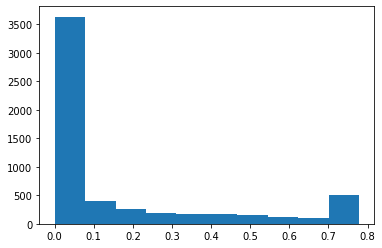

In [51]:
plt.hist(Target)

In [19]:
#encode the features

s = pd.Series(Regionmaps_df['Anno2'].tolist()+Regionmaps_df['Anno2'].tolist())
Region_encodes = pd.get_dummies(s)
Region_encodes.tail()

,Amygdala,Cerebellar Cortex,Cerebellar Nuclei,Cortical Subplate,Hippocampal Formation,Hippocampal Gate,Hypothalamus,Isocortex,Medulla,Midbrain,Olfactory Areas,Pallidum,Pons,Striatum,Thalamic
419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
422,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
Region_encodes = np.array(Region_encodes)
Region_encodes

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [24]:
# random forest

# build a df to store the information

# instead use the subset, this time I am trying the whole, which might be not suitable for ML, but I just wanted a positive control
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []
Celltype_mtx_norm_sub  = Celltype_mtx_norm[index]
Connectome_direct_density_sub = Connectome_direct_density[index, :]
Connectome_direct_density_sub = Connectome_direct_density_sub[:,index]
Distance_mtx_sub = Distance_mtx[index,:]
Distance_mtx_sub = Distance_mtx_sub[:,index]
for i in range(Celltype_mtx_norm_sub.shape[0]):
    for j in range(Celltype_mtx_norm_sub.shape[0]):
        
        if i >= 212 :
            i_ = i - 212
        else:
            i_ = i
        
        if j >= 212 :
            j_ = j - 212
        else:
            j_ = j
        if (Regionmaps_df['Anno2'][i_] == Regionmaps_df['Anno2'][j_] ):
            if ((i >= 212) == (j >= 212)):
                
                close_region = 1
            else: 
                close_region = 0.5
        else:
            close_region = 0
        
        #print(i)
        #print(j)
        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:],Distance_mtx_sub[i,j].reshape(1),
                                        Celltype_volumn[i].reshape(1),Celltype_volumn[j].reshape(1),np.array(close_region).reshape(1),
                                          Region_encodes[i],Region_encodes[j])))
                                          #np.dot(Celltype_mtx_norm_sub[i,:].reshape(25,1),Celltype_mtx_norm_sub[j,:].reshape(1,25)).reshape(625))))#,
                                       #   Celltype_mtx_norm_sub[i,:] - Celltype_mtx_norm_sub[j,:], 
                                       #np.log10(((Celltype_mtx_norm_sub[i,:]+ 0.0001 )/ (Celltype_mtx_norm_sub[j,:]+0.0001))+1))))
            #Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:],
            #                              Celltype_mtx_norm_sub[i,:] - Celltype_mtx_norm_sub[j,:], 
                                      # np.log10(((Celltype_mtx_norm_sub[i,:]+ 0.0001 )/ (Celltype_mtx_norm_sub[j,:]+0.0001))+1))))
            Target.append(Connectome_direct_density_sub[i,j])
            
            
print('?')
Dataset = np.stack(Dataset)
capped_Target = [5 if x>5 else x for x in Target]
capped_Target = [math.log2(x+1) for x in capped_Target]
Target =np.array([np.array(xi) for xi in capped_Target])   
print(Dataset.shape)
print(Target.shape)    
#X_train, X_test, y_train, y_test = train_test_split(Dataset, Target,test_size=.2,random_state =123)  

#
kf = KFold(n_splits=10, shuffle= True)
list_r2 = []
for train_index, test_index in kf.split(Dataset):
    #print(train_index)
    #print(test_index)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = Target[sub1], Target[sub2]
  
    
    
    #reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    #models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    #print(models)
    
    RF_model = RandomForestRegressor(n_estimators=100,max_features = 50,max_depth=20,min_samples_split =3)#,warm_start = True)  # height
    RF_model.fit(X_train, y_train)
    print('Traing fit')
    Predict = RF_model.predict(X_train)
    print(r2_score(y_train, Predict))
    print('Testing fit')
    Predict = RF_model.predict(X_test)
    print(r2_score(y_test, Predict))
    list_r2.append(r2_score(y_test, Predict))
    break
    '''
    svr_rbf = SVR()
    
    svr_rbf.fit(Dataset_Training_sub,Target_training_sub)


    Predict = svr_rbf.predict(Dataset_Testing_sub)
    _res = []
    _res.append('SVR')
    
    _res.append(r2_score(Target_Testing_sub,Predict))
    _res.append(mean_squared_error(Target_Testing_sub,Predict,squared=False))
    print(_res)
    '''

?
(179352, 84)
(179352,)
Traing fit
0.8529353474714196
Testing fit
0.4551785435148056


In [86]:
stats.mean(list_r2)

0.45483649752862304

In [85]:
# load heatmap
# try to do a viz

import seaborn as sns; sns.set_theme()

In [88]:
Dataset.shape

(179352, 84)

In [119]:
Predict =RF_model.predict(X_train)

In [116]:
X_train.shape

(161416, 84)

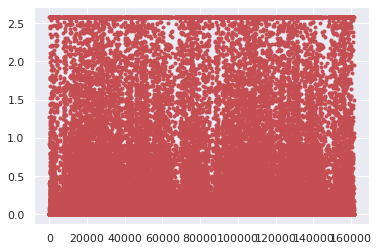

In [124]:
plt.plot(range(0,161416), y_train, 'r.')


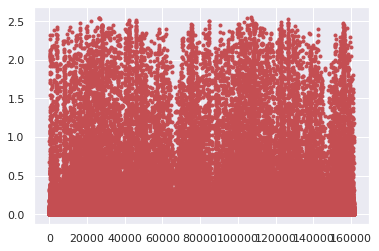

In [125]:
plt.plot(range(0,161416), Predict, 'r.')


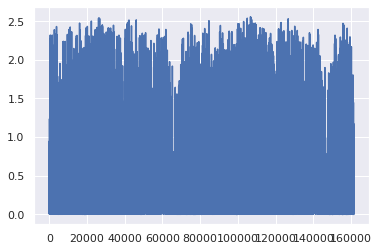

In [122]:
plt.plot(range(0,161416), Predict)


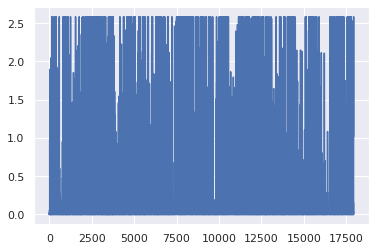

In [115]:
plt.plot(range(0,17936), )

In [106]:
r2_score(y_test, Predict)

0.4535598105621592

(array([15672.,   643.,   347.,   242.,   179.,   151.,   133.,    99.,
           89.,   380.]),
 array([0.        , 0.07781513, 0.15563025, 0.23344538, 0.3112605 ,
        0.38907563, 0.46689075, 0.54470588, 0.622521  , 0.70033613,
        0.77815125]),
 <BarContainer object of 10 artists>)

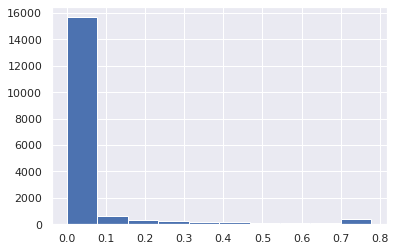

In [95]:
plt.hist(y_test)

In [91]:
test_viz = np.zeros((424,424))
for i in range(424):
    for j in range(424):
        if i == j 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
test_index

array([     0,      1,      4, ..., 179340, 179343, 179351])

In [87]:
X_test.shape

(17935, 84)

In [90]:
424 * 424

179776

In [27]:
Predict = RF_model.predict(X_train)
print(r2_score(y_train, Predict))


0.8480445849271138


In [61]:
Predict = RF_model.predict(X_test)
print(r2_score(y_test, Predict))


0.3468429374222749


In [25]:
import statistics as stats

In [26]:
# random forest

# build a df to store the information

# instead use the subset, this time I am trying the whole, which might be not suitable for ML, but I just wanted a positive control
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []
Celltype_mtx_norm_sub  = Celltype_mtx_norm[index]
Connectome_direct_density_sub = Connectome_direct_density[index, :]
Connectome_direct_density_sub = Connectome_direct_density_sub[:,index]
for i in range(Celltype_mtx_norm_sub.shape[0]):
    for j in range(Celltype_mtx_norm_sub.shape[0]):
        #print(i)
        #print(j)
        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:])))
            Target.append(Connectome_direct_density_sub[i,j])
            

Dataset = np.stack(Dataset)
Target =np.array([np.array(xi) for xi in Target])   
print(Dataset.shape)
print(Target.shape)    
#X_train, X_test, y_train, y_test = train_test_split(Dataset, Target,test_size=.2,random_state =123)  

#
kf = KFold(n_splits=10, shuffle= True)
list_r2 = []
for train_index, test_index in kf.split(Dataset):
    #print(train_index)
    #print(test_index)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = Target[sub1], Target[sub2]
  
    
    
    #reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    #models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    #print(models)
    
    #RF_model = RandomForestRegressor()
    #RF_model.fit(X_train, y_train)
    #Predict = RF_model.predict(X_test)
    #print(r2_score(y_test, Predict))
    #list_r2.append(r2_score(y_test, Predict))
    
    svr_rbf = SVR()
    
    svr_rbf.fit(X_train,y_train)


    Predict = svr_rbf.predict(X_test)
    print(r2_score(y_test, Predict))
    list_r2.append(r2_score(y_test, Predict))

(5700, 50)
(5700,)


NameError: name 'SVR' is not defined

### Gradiant boosting regressor

In [52]:
# random forest

# build a df to store the information

# instead use the subset, this time I am trying the whole, which might be not suitable for ML, but I just wanted a positive control
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []
Celltype_mtx_norm_sub  = Celltype_mtx_norm[index]
Connectome_direct_density_sub = Connectome_direct_density[index, :]  # temperaily removed the density
Connectome_direct_density_sub = Connectome_direct_density_sub[:,index]
for i in range(Celltype_mtx_norm_sub.shape[0]):
    for j in range(Celltype_mtx_norm_sub.shape[0]):
        #print(i)
        #print(j)
        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            #Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:])))
            Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:],
                                          Celltype_mtx_norm_sub[i,:] - Celltype_mtx_norm_sub[j,:], 
                                         np.log10((Celltype_mtx_norm_sub[i,:]+ 0.0001) / (Celltype_mtx_norm_sub[j,:]+0.0001)))))
            
            Target.append(Connectome_direct_density_sub[i,j])
            

Dataset = np.stack(Dataset)
Target =np.array([np.array(xi) for xi in Target])   
print(Dataset.shape)
print(Target.shape)    
#X_train, X_test, y_train, y_test = train_test_split(Dataset, Target,test_size=.2,random_state =123)  

#
kf = KFold(n_splits=10, shuffle= True)
list_r2 = []
for train_index, test_index in kf.split(Dataset):
    #print(train_index)
    #print(test_index)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = Target[sub1], Target[sub2]
  
    
    
    #reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    #models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    #print(models)
    

    
    #svr_rbf = SVR()
    
    #svr_rbf.fit(X_train,y_train)

    gb_model = GradientBoostingRegressor(random_state=0, n_estimators=200,max_features = 50)
    gb_model.fit(X_train,y_train)
    print('Training')
    Predict = gb_model.predict(X_train)
    print(r2_score(y_train, Predict))
    Predict = gb_model.predict(X_test)
    print(r2_score(y_test, Predict))
    list_r2.append(r2_score(y_test, Predict))

(5700, 100)
(5700,)
Training
0.7372042375072074
0.33756204317402305
Training
0.7507337856368136
0.1931689923108918
Training
0.7468316895839594
0.13250769126718465
Training
0.726058724880232
0.3506874096434336
Training
0.7409728342515443
0.33086620988727955
Training
0.7505609620944415
0.21496399070663508
Training
0.7506621873272188
0.18849332101589955
Training
0.7350367649974109
0.3417087824664059
Training
0.7560514351942671
0.023191090884260968
Training
0.7439036032801696
0.17832855845847762


In [53]:
stats.mean(list_r2)

0.22914780898144918

### Generalize linear models



In [50]:
# linear regression
from sklearn.linear_model import ElasticNetCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []
Celltype_mtx_norm_sub  = Celltype_mtx_norm[index]
Connectome_direct_density_sub = Connectome_direct_density[index, :]
Connectome_direct_density_sub = Connectome_direct_density_sub[:,index]
for i in range(Celltype_mtx_norm_sub.shape[0]):
    for j in range(Celltype_mtx_norm_sub.shape[0]):
        #print(i)
        #print(j)
        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:],
                                          Celltype_mtx_norm_sub[i,:] - Celltype_mtx_norm_sub[j,:], 
                                         np.log10((Celltype_mtx_norm_sub[i,:] / (Celltype_mtx_norm_sub[j,:]+0.0001))+ 0.0001),
                                          Celltype_mtx_norm_sub[i,:] + Celltype_mtx_norm_sub[j,:],
                                          Celltype_mtx_norm_sub[i,:] * Celltype_mtx_norm_sub[j,:])))
            
            Target.append(Connectome_direct_density_sub[i,j])
            

Dataset = np.stack(Dataset)
Target =np.array([np.array(xi) for xi in Target])   
print(Dataset.shape)
print(Target.shape)    
#X_train, X_test, y_train, y_test = train_test_split(Dataset, Target,test_size=.2,random_state =123)  

#
kf = KFold(n_splits=10, shuffle= True)
list_r2 = []
for train_index, test_index in kf.split(Dataset):
    #print(train_index)
    #print(test_index)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = Target[sub1], Target[sub2]
  
    
    
    #reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    #models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    #print(models)
    

    
    #svr_rbf = SVR()
    
    #svr_rbf.fit(X_train,y_train)

    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    Predict = lr.predict(X_test)
    print(r2_score(y_test, Predict))
    list_r2.append(r2_score(y_test, Predict))

(5700, 150)
(5700,)
0.12231083470424076
0.009778120199164575
-0.00020814459896767445
0.12436914912425978
0.026919875694805917
0.1125847094735768
0.029738160109131107
0.11879729630244595
0.12432107607876541
0.13118580379503442


In [51]:
# linear regression
from sklearn.linear_model import ElasticNetCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
res_df =[]


Target = []
Dataset = []
Celltype_mtx_norm_sub  = Celltype_mtx_norm[index]
Connectome_direct_density_sub = Connectome_direct_density[index, :]
Connectome_direct_density_sub = Connectome_direct_density_sub[:,index]
for i in range(Celltype_mtx_norm_sub.shape[0]):
    for j in range(Celltype_mtx_norm_sub.shape[0]):
        #print(i)
        #print(j)
        if i == j:
            pass       
        else:

            #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
            #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
            Dataset.append(np.concatenate((Celltype_mtx_norm_sub[i,:],Celltype_mtx_norm_sub[j,:],
                                          Celltype_mtx_norm_sub[i,:] - Celltype_mtx_norm_sub[j,:], 
                                         np.log10((Celltype_mtx_norm_sub[i,:] / (Celltype_mtx_norm_sub[j,:]+0.0001))+ 0.0001),
                                          Celltype_mtx_norm_sub[i,:] + Celltype_mtx_norm_sub[j,:],
                                          Celltype_mtx_norm_sub[i,:] * Celltype_mtx_norm_sub[j,:])))
            
            Target.append(Connectome_direct_density_sub[i,j])
            

Dataset = np.stack(Dataset)
Target =np.array([np.array(xi) for xi in Target])   
print(Dataset.shape)
print(Target.shape)    
#X_train, X_test, y_train, y_test = train_test_split(Dataset, Target,test_size=.2,random_state =123)  

#
kf = KFold(n_splits=10, shuffle= True)
list_r2 = []
for train_index, test_index in kf.split(Dataset):
    #print(train_index)
    #print(test_index)
    sub1 = train_index#), int(len(train_index))
    sub2 = test_index#), int(len(test_index)/50))
    X_train, X_test = Dataset[sub1], Dataset[sub2]
    y_train, y_test = Target[sub1], Target[sub2]
  
    
    
    #reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    #models, predictions = reg.fit(X_train, X_test, y_train, y_test)
    #print(models)
    

    
    #svr_rbf = SVR()
    
    #svr_rbf.fit(X_train,y_train)

    Ela_CV = ElasticNetCV()
    Ela_CV.fit(X_train,y_train)
    
    Predict = Ela_CV.predict(X_test)
    print(r2_score(y_test, Predict))
    list_r2.append(r2_score(y_test, Predict))

(5700, 150)
(5700,)
0.1334349810612293
0.08590726495990231
0.03781748868133228
0.06682241422926694
0.05511383086493915
0.12182299449231981
0.09485099867408486
0.07188157488592894
0.11233070984798721
0.1228856529753537


In [157]:
stats.mean(list_r2)

0.04962714619583778

In [152]:
list_r2

[-0.0070504044985018055,
 0.00812139705515258,
 -0.005589574976387013,
 0.0005921431671027655,
 -0.012387626697368592,
 -0.016713000581362714,
 0.003728539674076048,
 -9.643197111297575e-05,
 0.012950979568186582,
 -0.011551409134521018]

In [23]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,-0.02,0.05,114.68,3.94
LassoLars,-0.10,-0.02,118.69,0.10
DummyRegressor,-0.10,-0.02,118.69,0.04
NuSVR,-0.10,-0.03,119.00,1.86
SVR,-0.10,-0.03,119.05,1.97
HuberRegressor,-0.11,-0.03,119.17,1.64
LinearSVR,-0.11,-0.03,119.19,0.60
PassiveAggressiveRegressor,-0.11,-0.04,119.56,0.17
LassoLarsCV,-0.13,-0.05,120.25,0.43


In [ ]:
models.to_csv('res_withoutnormal.csv', sep = '\t')

In [19]:
df =pd.DataFrame({'Model': ['AdaBoostRegressor'], 'R-Squared': [-9.350436758649849], 
              'Adjusted R-Squared': [-10.127496575365303], 'RMSE': [289.0818274995949], 
              'Time taken': [1.1686530113220215]})
df

,Model,R-Squared,Adjusted R-Squared,RMSE,Time taken
0,AdaBoostRegressor,-9.35,-10.13,289.08,1.17


In [97]:
# support vector
from sklearn.svm import SVR

In [14]:
# linear regression
from sklearn.linear_model import LinearRegression



k = 0
for train_index, test_index in KF.split(list(range(0,424))):
    k = k +1
    print('Perform the validation, iteration:'+str(k))
    Targets_Train_set = Connectome_direct_density[:,train_index]
    Targets_Train_set  = Targets_Train_set[train_index,:]
    Targets_Test_set  = Connectome_direct_density[:,test_index]
    Targets_Test_set   = Targets_Test_set[test_index,:]
    
    
    Dataset_Train_set = Celltype_mtx_norm[train_index,:]
    Dataset_Test_set  = Celltype_mtx_norm[test_index,:]
    print('Build Training set')
    Target_training = []
    Dataset_Training = []
    for i in range(Dataset_Train_set.shape[0]):
        for j in range(Dataset_Train_set.shape[0]):
            #print(i)
            #print(j)
            if i == j:
                pass       
            else:

                #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
                #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
                Dataset_Training.append(np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:])))
                Target_training.append(Targets_Train_set[i,j])
    Dataset_Training = np.stack(Dataset_Training)
    Target_training =np.array([np.array(xi) for xi in Target_training])   
    
    print('Build Testing set')
    Target_Testing = []
    Dataset_Testing = []
    for i in range(Dataset_Test_set.shape[0]):
        for j in range(Dataset_Test_set.shape[0]):
            #print(i)
            #print(j)
            if i == j:
                pass       
            else:
                #print(Dataset_Test_set[i,j])

                #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
                #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
                Dataset_Testing.append(np.concatenate((Dataset_Test_set[i,:],Dataset_Test_set[j,:])))
                Target_Testing.append(Targets_Test_set[i,j])
    Dataset_Testing = np.stack(Dataset_Testing)
    Target_Testing =np.array([np.array(xi) for xi in Target_Testing])      
         
    reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    # split into 50 %
    sub_1 = sample(list(range(Dataset_Training.shape[0])),int(Dataset_Training.shape[0]/40) )
    sub_2 = sample(list(range(Dataset_Testing.shape[0])),int(Dataset_Testing.shape[0]/10) )
    # subset 50 percents
    Dataset_Training_sub = Dataset_Training[sub_1,:]
    
    Target_training_sub = Target_training[sub_1]
    
    Dataset_Testing_sub = Dataset_Testing[sub_2,:]
    
    Target_Testing_sub = Target_Testing[sub_2]
    
    #models, predictions = reg.fit(Dataset_Training_sub, Dataset_Testing_sub, Target_training_sub, Target_Testing_sub)
    #print(models)
    
    # support vector regressor
    
    
    Lr = LinearRegression()
    
    Lr.fit(Dataset_Training_sub,Target_training_sub)


    Predict = Lr.predict(Dataset_Testing_sub)
    _res = []
    _res.append('LinearRegression')
    
    _res.append(r2_score(Target_Testing_sub,Predict))
    _res.append(mean_squared_error(Target_Testing_sub,Predict,squared=False))
    res_df.append(_res)
    break 

Perform the validation, iteration:1
Build Training set
Build Testing set


In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression



k = 0
for train_index, test_index in KF.split(list(range(0,424))):
    k = k +1
    print('Perform the validation, iteration:'+str(k))
    Targets_Train_set = Connectome_direct_density[:,train_index]
    Targets_Train_set  = Targets_Train_set[train_index,:]
    Targets_Test_set  = Connectome_direct_density[:,test_index]
    Targets_Test_set   = Targets_Test_set[test_index,:]
    
    
    Dataset_Train_set = Celltype_mtx_norm[train_index,:]
    Dataset_Test_set  = Celltype_mtx_norm[test_index,:]
    print('Build Training set')
    Target_training = []
    Dataset_Training = []
    for i in range(Dataset_Train_set.shape[0]):
        for j in range(Dataset_Train_set.shape[0]):
            #print(i)
            #print(j)
            if i == j:
                pass       
            else:

                #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
                #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
                Dataset_Training.append(np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:])))
                Target_training.append(Targets_Train_set[i,j])
    Dataset_Training = np.stack(Dataset_Training)
    Target_training =np.array([np.array(xi) for xi in Target_training])   
    
    print('Build Testing set')
    Target_Testing = []
    Dataset_Testing = []
    for i in range(Dataset_Test_set.shape[0]):
        for j in range(Dataset_Test_set.shape[0]):
            #print(i)
            #print(j)
            if i == j:
                pass       
            else:
                #print(Dataset_Test_set[i,j])

                #_Dataset_Training = np.concatenate((Dataset_Train_set[i,:],Dataset_Train_set[j,:]))
                #Dataset_Training = np.stack((Dataset_Training,_Dataset_Training))
                Dataset_Testing.append(np.concatenate((Dataset_Test_set[i,:],Dataset_Test_set[j,:])))
                Target_Testing.append(Targets_Test_set[i,j])
    Dataset_Testing = np.stack(Dataset_Testing)
    Target_Testing =np.array([np.array(xi) for xi in Target_Testing])      
         
    reg = LazyRegressor(verbose=1, predictions=True,ignore_warnings=False, custom_metric=None)
    # split into 50 %
    sub_1 = sample(list(range(Dataset_Training.shape[0])),int(Dataset_Training.shape[0]/40) )
    sub_2 = sample(list(range(Dataset_Testing.shape[0])),int(Dataset_Testing.shape[0]/10) )
    # subset 50 percents
    Dataset_Training_sub = Dataset_Training[sub_1,:]
    
    Target_training_sub = Target_training[sub_1]
    
    Dataset_Testing_sub = Dataset_Testing[sub_2,:]
    
    Target_Testing_sub = Target_Testing[sub_2]
    
    #models, predictions = reg.fit(Dataset_Training_sub, Dataset_Testing_sub, Target_training_sub, Target_Testing_sub)
    #print(models)
    
    # support vector regressor
    
    
    Lr = LinearRegression()
    
    Lr.fit(Dataset_Training_sub,Target_training_sub)


    Predict = Lr.predict(Dataset_Testing_sub)
    _res = []
    _res.append('LinearRegression')
    
    _res.append(r2_score(Target_Testing_sub,Predict))
    _res.append(mean_squared_error(Target_Testing_sub,Predict,squared=False))
    res_df.append(_res)
    break 

In [15]:
res_df

[['RandomForestRegressor', -2.1711166186563435, 2.74740338024046],
 ['SVR', -0.011876711838972653, 2.7476554113754608],
 ['LinearRegression', -0.09461096965128601, 1.7275675777012653]]

In [ ]:
Dataset_Testing.shape

In [ ]:
from sklearn import datasets
from sklearn.utils import shuffle

In [ ]:
X_train.shape

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(Dataset_Training, Dataset_Testing, Target_training, Target_Testing)

print(models)

In [ ]:
print(models)

In [ ]:
p=1